In [45]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 10, 7
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 500

save_figures_to_latex = False
figures_path = '/home/tellocam/Projects/HPC/Exercise_2/latex_ex_2/figures'


In [62]:
txt_files = glob.glob("EX1_*.txt")

df_dict = {}
for file in txt_files:
    df = pd.read_csv(file, sep=',', header=None)
    df.rename(columns={0:"count", 1:"bytes", 2:"avg", 3:"min", 4:"med", 5:"stddev", 6:"CI"}, inplace=True)
    df_dict[file] = df

legend_dict = df_dict.copy()
for key in legend_dict:
    legend_dict[key] = key
    legend_dict[key] = legend_dict[key].replace('EX1_', '')
    legend_dict[key] = legend_dict[key].replace('.txt', '')
    legend_dict[key] = legend_dict[key].replace('_', ' ')

{'EX1_N1_T32_P10.txt': 'N1 T32 P10', 'EX1_N1_T32_P2.txt': 'N1 T32 P2', 'EX1_N36_T32_P10.txt': 'N36 T32 P10', 'EX1_N1_T16_P2.txt': 'N1 T16 P2', 'EX1_N36_T1_P2.txt': 'N36 T1 P2', 'EX1_N20_T32_P10.txt': 'N20 T32 P10', 'EX1_N36_T32_P2.txt': 'N36 T32 P2', 'EX1_N36_T1_P10.txt': 'N36 T1 P10', 'EX1_N1_T16_P10.txt': 'N1 T16 P10', 'EX1_N20_T32_P2.txt': 'N20 T32 P2', 'EX1_N36_T16_P10.txt': 'N36 T16 P10', 'EX1_N36_T16_P2.txt': 'N36 T16 P2', 'EX1_N20_T16_P10.txt': 'N20 T16 P10', 'EX1_N20_T16_P2.txt': 'N20 T16 P2', 'EX1_N20_T1_P10.txt': 'N20 T1 P10', 'EX1_N20_T1_P2.txt': 'N20 T1 P2'}


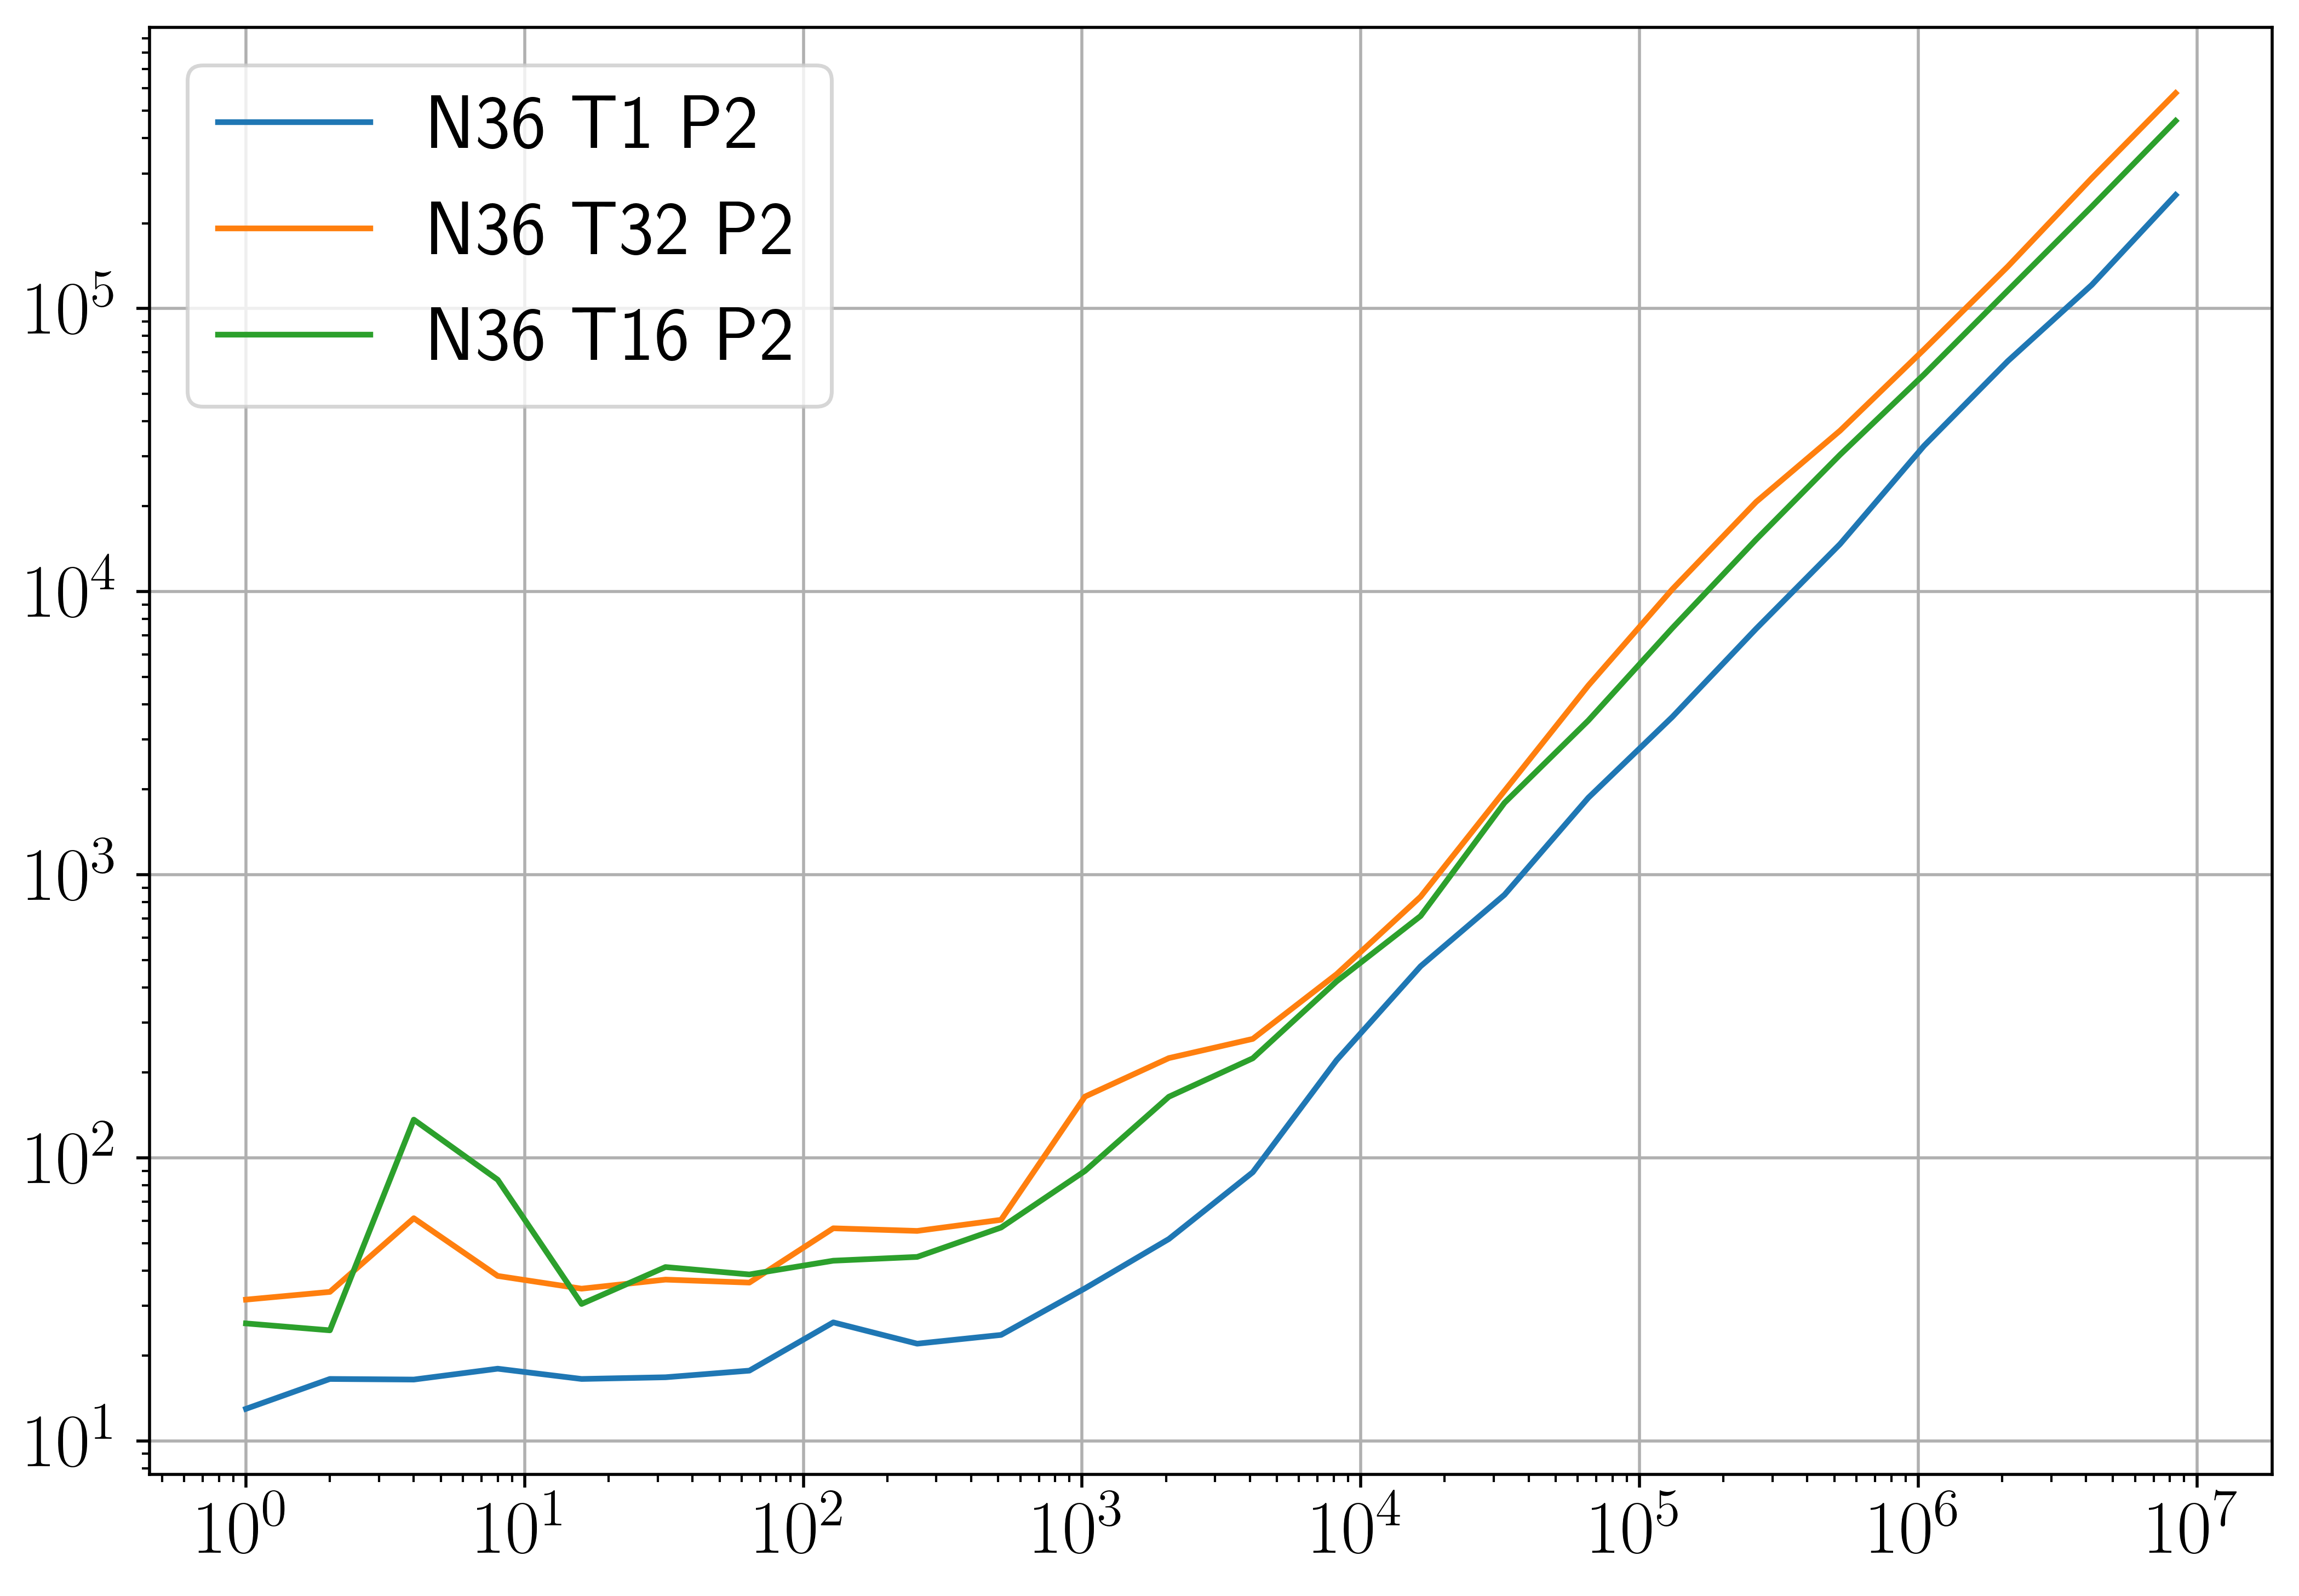

In [63]:
plt.figure(1)
plt.grid()
for key in df_dict.keys():
    legend_entry = str(key)
    if 'P2' in key and 'N36' in key:
        plot_df = df_dict.get(key)
        plt.loglog(plot_df['count'], plot_df['avg'], label=legend_dict[key])
    del legend_entry
plt.legend()